# Water Challenge

In this project we aim to perform a clustering of mexican municipalities to better understand the different regions that exists within the country. 

First we will import our datasets and perform its relevant data integration.

In [90]:
import pandas as pd
import geopandas as gpd # For .shp and .geoJSON files
import matplotlib.pyplot as plt
import rasterio # For tiff datasets
from rasterio.plot import show
import pyogrio
from shapely.geometry import Point
import numpy as np

In [113]:
def plot_map(df, title , column='personas',cmap='viridis', markersize=None, figsize=(12, 6)):
    # Create the plot with enhanced formatting
    fig, ax = plt.subplots(figsize=figsize)
    
    # Plot with size proportional to number of people
    df.plot(column=column, 
                 markersize=markersize,  # Adjust divisor to control bubble sizes
                 legend=True, 
                 cmap=cmap, 
                 ax=ax)
    
    # Set axis labels
    ax.set_xlabel("Longitude", fontsize=14)
    ax.set_ylabel("Latitude", fontsize=14)
    
    plt.title(title, fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()

### División politica de México por municipios

Muestra 2471 poligonos que forman los municipios
En total, México se divide en 2477 unidades territoriales de segundo nivel que incluye a 16 demarcaciones territoriales de la Ciudad de México y 2461 municipios en los estados. 

Contiene: 
- Area
- Perímetro
- Nombre del municipio
- Geometria 

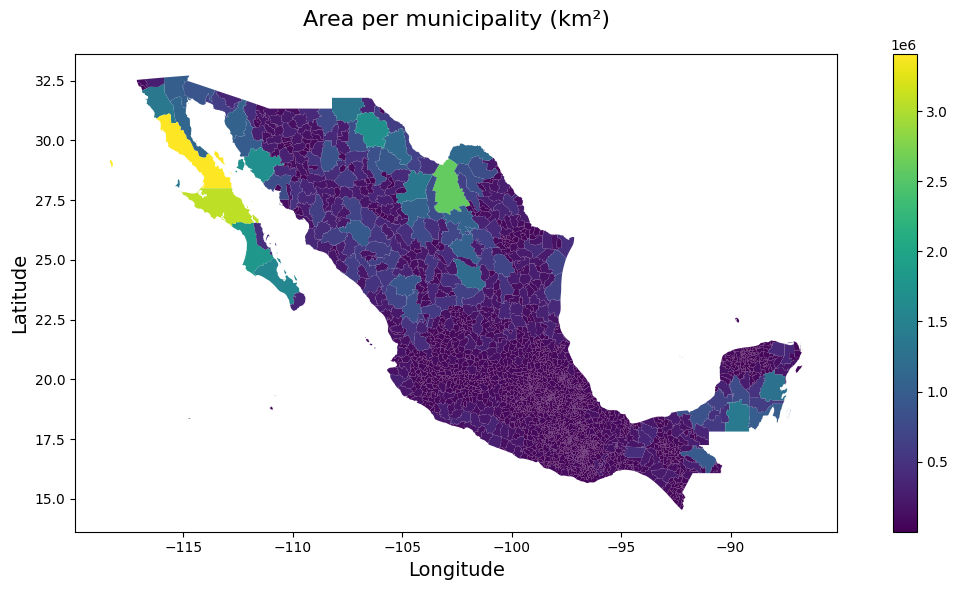

In [114]:
# Division política de México por municipios
municipios_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/mun22gw/mun22gw.shp'
municipios = gpd.read_file(municipios_path)
plot_map(municipios, "Area per municipality (km²)", column = 'AREA')

In [6]:
municipios[['CVEGEO','AREA']]

,CVEGEO,AREA
0,01008,85779.057424
1,01009,22966.101228
2,01010,50405.098875
3,01011,13777.017628
4,01001,116635.924756
...,...,...
2470,32014,478381.878319
2471,32043,19747.810966
2472,32045,53912.296267
2473,32046,71692.148226


### Población por municipio
Contiene la poblacion total, masculina y femenina ademas de el total de viviendas habitadas en 2478 municipios.

In [132]:
# Population per municipality
poblacion_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/catun_municipio/AGEEML_2025414145400_utf.csv'
poblacion = pd.read_csv(poblacion_path)
poblacion['CVEGEO'] = poblacion['CVEGEO'].astype(str).str.zfill(5)
poblacion.replace('-',None,inplace=True)
poblacion[['POB_TOTAL', 'TOTAL DE VIVIENDAS HABITADAS']].corr()

,POB_TOTAL,TOTAL DE VIVIENDAS HABITADAS
POB_TOTAL,1.000000,0.997392
TOTAL DE VIVIENDAS HABITADAS,0.997392,1.000000


In [133]:
poblacion[['CVEGEO','NOM_ENT','NOM_MUN', 'POB_TOTAL']]

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL
0,01001,Aguascalientes,Aguascalientes,948990
1,01002,Aguascalientes,Asientos,51536
2,01003,Aguascalientes,Calvillo,58250
3,01004,Aguascalientes,Cosío,17000
4,01005,Aguascalientes,Jesús María,129929
...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446
2474,32055,Zacatecas,Villanueva,31558
2475,32056,Zacatecas,Zacatecas,149607
2476,32057,Zacatecas,Trancoso,20455


### Información geoespacial sobre la gestión municipal de los servicios de agua y saneamiento


Representación geoespacial de los elementos involucrados en la prestación de los servicios municipales de agua y saneamiento como resultado de los datos obtenidos durante el levantamiento del Censo Nacional de Gobiernos Municipales y Demarcaciones Territoriales de la Ciudad de México durante el año 2021. Este producto contiene información digital estructurada en formato vectorial, la cual esta codificada de acuerdo con el Diccionario de datos de la gestión municipal de los servicios de agua y saneamiento. Esta capa contiene los siguientes elementos: **Prestadores de servicios de agua potable**, **Obras de toma para captación de agua**, **Plantas de potabilización**, **Puntos de descarga de aguas residuales municipales sin tratamiento** y **Plantas de tratamiento de aguas residuales**, 

con atributos como: 
- clave geográfica
- clave de entidad
- nombre de entidad
- clave municipio
- nombre de municipio
- tipo
- nombre del tipo
- latitud
- longitud
- origen de las coordenadas
- calificador de posición.

In [59]:
# Información geoespacial sobre la gestión municipal de los servicios de agua y saneamiento
servicios_agua_path = "/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/889463858560_s/conjunto_de_datos/cngmd_2021_m5_agua_potable_y_saneamiento.shp"
servicios_agua = gpd.read_file(servicios_agua_path)
servicios_agua['CVEGEO'] = servicios_agua['cve_ent'].astype(str).str.zfill(2) + servicios_agua['cve_mun'].astype(str).str.zfill(3)

In [60]:
servicios_agua.head()

,cve_geo,cve_ent,nom_ent,cve_mun,nom_mun,tipo,nom_tipo,latitud,longitud,orig_coord,cali_pos,geometry,CVEGEO
0,01001001AR,01,Aguascalientes,001,Aguascalientes,Punto de descarga,AGOSTADERITO,21.756500,-102.347167,Campo,Definida,POINT (-102.34717 21.7565),01001
1,01001001FC,01,Aguascalientes,001,Aguascalientes,Obra de toma para la captación de agua,P-001,21.882885,-102.312235,Gabinete,Definida,POINT (-102.31224 21.88288),01001
2,01001001PA,01,Aguascalientes,001,Aguascalientes,Prestador de Servicio de agua potable,CONCESIONARIA PROACTIVA MEDIO AMBIENTE CAASA,21.800250,-102.288722,Campo,Definida,POINT (-102.28872 21.80025),01001
3,01001001PT,01,Aguascalientes,001,Aguascalientes,Planta de tratamiento,PARQUE MEXICO,21.905333,-102.265861,Campo,Definida,POINT (-102.26586 21.90533),01001
4,01001002FC,01,Aguascalientes,001,Aguascalientes,Obra de toma para la captación de agua,P-002,21.882361,-102.315472,Campo,Definida,POINT (-102.31547 21.88236),01001


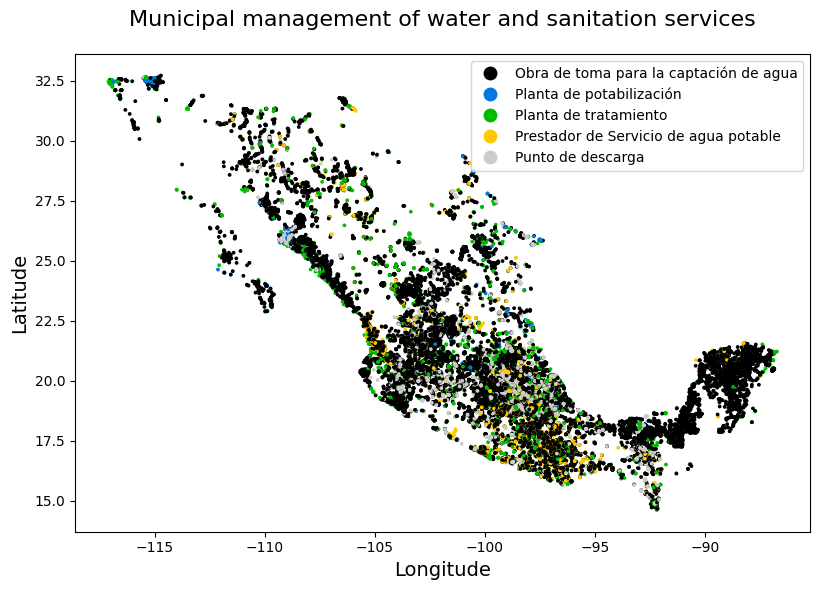

In [116]:
plot_map(servicios_agua, 'Municipal management of water and sanitation services', column = 'tipo', markersize =3, cmap = 'nipy_spectral')
# servicios_agua.plot(column='tipo',legend= True, markersize = 3,cmap = 'nipy_spectral', legend_kwds={'bbox_to_anchor': (1.05, 1), 'loc': 'upper left'}, figsize = (14,7))
# plt.title('Municipal management of water and sanitation services')

In [12]:
list(servicios_agua['tipo'].unique())

['Punto de descarga',
 'Obra de toma para la captación de agua',
 'Prestador de Servicio de agua potable',
 'Planta de tratamiento',
 'Planta de potabilización']

In [13]:
tipos = list(servicios_agua['tipo'].unique())
columnas_agua = ['agua_AR','agua_FC','agua_PA','agua_PT', 'agua_PP']
servicios_agua_mun = poblacion[['CVEGEO','NOM_ENT','NOM_MUN']].copy()
servicios_agua_mun.set_index('CVEGEO',inplace=True)
for i in range(len(tipos)):
    servicios_agua_mun[columnas_agua[i]] = servicios_agua[servicios_agua['tipo']==tipos[i]].groupby('CVEGEO').count()['tipo']
servicios_agua_mun.fillna(0,inplace=True)
servicios_agua_mun.reset_index(inplace=True)
for i in range(len(tipos)):
    print('Se encontraron', len(servicios_agua_mun[servicios_agua_mun[columnas_agua[i]]>0]), 'municipios con al menos 1', tipos[i])

Se encontraron 1490 municipios con al menos 1 Punto de descarga
Se encontraron 2431 municipios con al menos 1 Obra de toma para la captación de agua
Se encontraron 2356 municipios con al menos 1 Prestador de Servicio de agua potable
Se encontraron 1265 municipios con al menos 1 Planta de tratamiento
Se encontraron 232 municipios con al menos 1 Planta de potabilización


In [14]:
servicios_agua_mun

,CVEGEO,NOM_ENT,NOM_MUN,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP
0,01001,Aguascalientes,Aguascalientes,91.0,226.0,2.0,24.0,0.0
1,01002,Aguascalientes,Asientos,0.0,54.0,1.0,9.0,0.0
2,01003,Aguascalientes,Calvillo,7.0,43.0,1.0,4.0,0.0
3,01004,Aguascalientes,Cosío,10.0,13.0,1.0,3.0,0.0
4,01005,Aguascalientes,Jesús María,34.0,42.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,11.0,31.0,1.0,3.0,0.0
2474,32055,Zacatecas,Villanueva,4.0,10.0,1.0,2.0,0.0
2475,32056,Zacatecas,Zacatecas,5.0,22.0,1.0,2.0,0.0
2476,32057,Zacatecas,Trancoso,8.0,9.0,1.0,2.0,0.0


#### Resumen `servicios_agua_mun`
Contiene las cuantas instalaciones de **servicios de agua y saneamiento** tiene cada municipio
- `agua_AR` : Punto de descarga
- `agua_FC` : Obra de toma para la captación de agua
- `agua_PA` : Prestador de Servicio de agua potable
- `agua_PT` : Planta de tratamiento
- `agua_PP` : Planta de potabilización'

```
servicios_agua_mun[['CVEGEO','agua_AR', 'agua_FC', 'agua_PA', 'agua_PT', 'agua_PP']]
```

### Índice Nacional de Inundación

Es un índice que toma en cuenta parámetros hidrológicos como la precipitación acumulada, pendiente del terreno, acumulación de escurrimiento y retención máxima de humedad del suelo

Contiene las siguentes columnas:
- OBJECTID
- NOM_MUN
- OID_1
- CVE_MPIO
- IVI__ESTAD
- IVI__POB20
- UMBRAL12H
- IVI__VULNE
- MUNICIPIO
- UMBRAL
- AREAKMKM
- ÁREA_INUN
- PORCENTA_1
- PELIGRO_IN
- CLV
- SHAPE_AREA
- SHAPE_LEN
- geometry

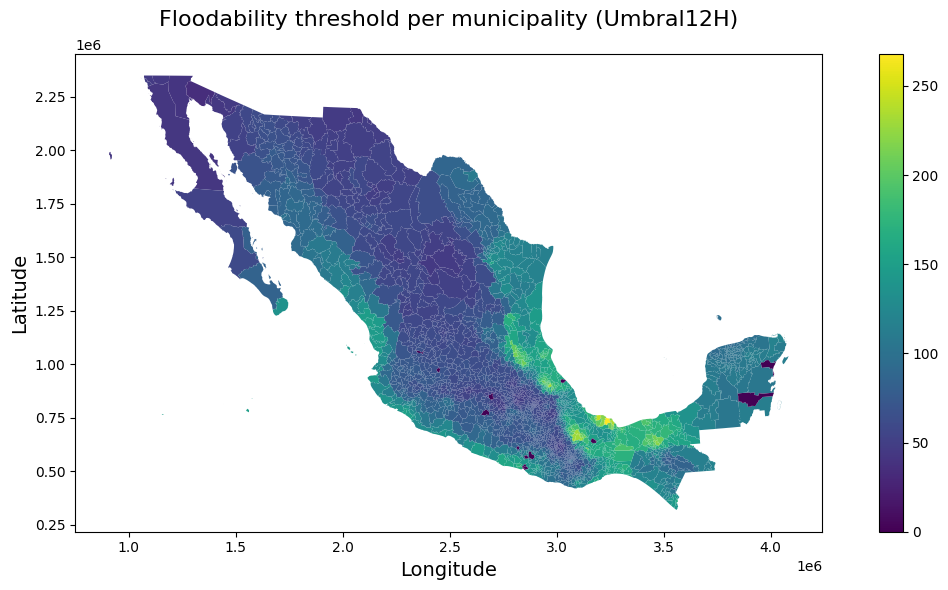

In [117]:
ind_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/Indice_de_peligro_por_inundacion/IndPel_Inundacion.shp'
inundabilidad = gpd.read_file(ind_path)
plot_map(inundabilidad, 'Floodability threshold per municipality (Umbral12H)',column= 'UMBRAL12H')
#inundabilidad.plot(column= 'UMBRAL12H',legend=True, figsize = (14,7))
#plt.title('Floodability threshold per municipality')

In [62]:
len(inundabilidad)

2457

In [20]:
inundabilidad['CVEGEO'] = inundabilidad['CVE_MPIO'].astype(str).str.zfill(5)
inundabilidad[['CVEGEO','UMBRAL12H','PORCENTA_1']] # Umbral y porcentaje de inundabilidad

,CVEGEO,UMBRAL12H,PORCENTA_1
0,15041,69.05997,1.247182
1,15042,50.74218,10.807944
2,15043,70.98399,1.560134
3,15045,64.66266,4.645753
4,15046,66.61413,0.181656
...,...,...,...
2452,31101,100.22850,6.930963
2453,31036,102.42540,23.994856
2454,31056,105.68070,11.923813
2455,31028,95.99220,5.824085


#### Resumen `indundabilidad`
Contiene las columnas del Índice Nacional de Inundación

### Poblacion y altutud de cada localidad de México

Contiene la poblacion total, masculina y femenina ademas de el total de viviendas habitadas y la altitud en 297036 localidades de México. 

In [52]:
# Altitud de cada localidad
altitud_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/altitud_poblacion_localidad/AGEEML_2025414942241_utf.csv'
altitud = pd.read_csv(altitud_path)
# Convert to GeoDataFrame using the decimal latitude/longitude columns
altitud = gpd.GeoDataFrame(
    altitud,
    geometry=gpd.points_from_xy(
        altitud['LON_DECIMAL'],  # Longitude (x coordinate)
        altitud['LAT_DECIMAL'],  # Latitude (y coordinate)
    ),
    crs="EPSG:4326"  # WGS84 coordinate reference system
)

In [53]:
altitud.head()

,CVEGEO,Estatus,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,...,LONGITUD,LAT_DECIMAL,LON_DECIMAL,ALTITUD,CVE_CARTA,POB_TOTAL,POB_MASCULINA,POB_FEMENINA,TOTAL DE VIVIENDAS HABITADAS,geometry
0,10010001,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,1,AGUASCALIENTES,U,...,102°17´45.768 W,21.879822,-102.296046,1878,F13D19,863893,419168,444725,246259,POINT (-102.29605 21.87982)
1,10010094,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,94,GRANJA ADELITA,R,...,102°22´24.710 W,21.871874,-102.373530,1901,F13D18,5,*,*,2,POINT (-102.37353 21.87187)
2,10010096,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,96,AGUA AZUL,R,...,102°21´25.639 W,21.883756,-102.357122,1861,F13D18,41,24,17,12,POINT (-102.35712 21.88376)
3,10010100,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,100,RANCHO ALEGRE,R,...,102°22´21.833 W,21.854683,-102.372731,1879,F13D18,0,0,0,0,POINT (-102.37273 21.85468)
4,10010102,NaN,1,AGUASCALIENTES,AGS.,1,AGUASCALIENTES,102,LOS ARBOLITOS [RANCHO],R,...,102°21´26.261 W,21.780180,-102.357295,1861,F13D18,8,*,*,2,POINT (-102.3573 21.78018)


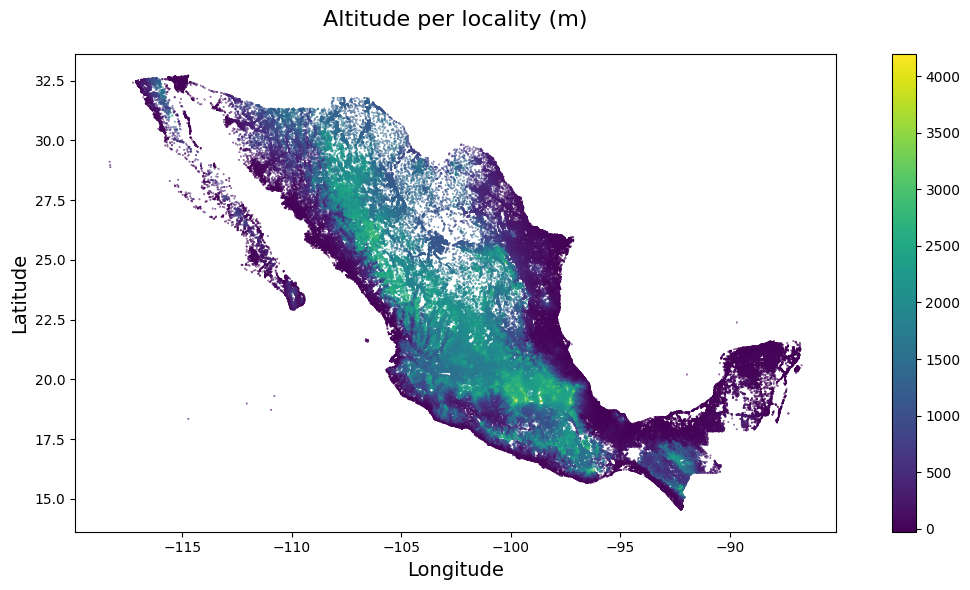

In [118]:
#altitud.plot(column='ALTITUD',legend=True, markersize=0.1, figsize =(14,7))
#plt.title('Altitude per locality')
plot_map(altitud, 'Altitude per locality (m)', column='ALTITUD', markersize=0.1)

In [128]:
print('Found ',len(altitud),' localities from ',len(municipios),' municipalities')
print('Average localities per municipality: ', len(altitud)/len(municipios))


Found  297036  localities from  2475  municipalities
Average localities per municipality:  120.01454545454546


In [129]:
# First, create a unique municipality identifier by combining CVE_ENT and CVE_MUN
altitud['CVEGEO'] = altitud['CVE_ENT'].astype(str).str.zfill(2) + altitud['CVE_MUN'].astype(str).str.zfill(3)


In [130]:

# Now group by this new identifier and calculate the average altitude
avg_altitude_by_municipality = altitud.groupby('CVEGEO').agg({
    'NOM_ENT': 'first',  # Keep the state name
    'NOM_MUN': 'first',  # Keep the municipality name
    'ALTITUD': 'mean'   # Calculate average altitude
}).reset_index()

In [131]:
avg_altitude_by_municipality

,CVEGEO,NOM_ENT,NOM_MUN,ALTITUD
0,01001,AGUASCALIENTES,AGUASCALIENTES,1918.046196
1,01002,AGUASCALIENTES,ASIENTOS,2030.520325
2,01003,AGUASCALIENTES,CALVILLO,1827.143813
3,01004,AGUASCALIENTES,COSÍO,1967.656566
4,01005,AGUASCALIENTES,JESÚS MARÍA,1936.513072
...,...,...,...,...
2473,32054,ZACATECAS,VILLA HIDALGO,2167.903226
2474,32055,ZACATECAS,VILLANUEVA,1962.535211
2475,32056,ZACATECAS,ZACATECAS,2263.314961
2476,32057,ZACATECAS,TRANCOSO,2136.738095


### Indice de Impacto humano
Archivo tif

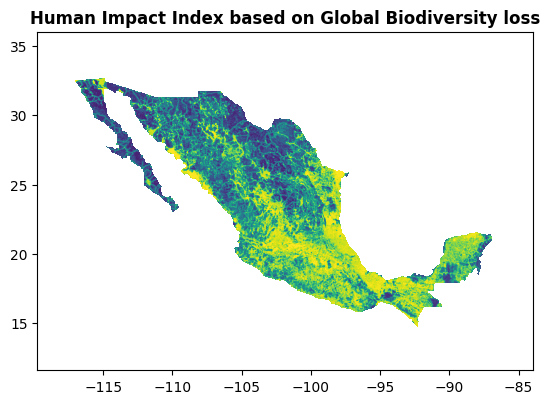

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [120]:
impacto_h_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/indihum14gw/indihum14gw.tif'
human_impact = rasterio.open(impacto_h_path)
show(human_impact,label =True, title = 'Human Impact Index based on Global Biodiversity loss')
human_impact.crs

In [64]:
municipios.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [66]:
human_impact.crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [70]:
import rasterio
from rasterio.mask import mask
import numpy as np

# 3. Ensure both datasets are in the same CRS
municipios = municipios.to_crs(human_impact.crs)

# 4. Prepare output dataframe
results = []

# 5. Process each municipality
for idx, row in municipios.iterrows():
    try:
        # Clip raster to municipality polygon
        out_image, out_transform = mask(
            human_impact,
            [row.geometry],
            crop=True,
            nodata=human_impact.nodata  # Handle no-data values
        )
        
        # Remove no-data values and flatten array
        data = out_image[0]  # First band
        valid_values = data[data != human_impact.nodata]
        
        if len(valid_values) > 0:
            avg_impact = np.mean(valid_values)
            std_impact = np.std(valid_values)
            pixel_count = len(valid_values)
        else:
            avg_impact = np.nan
            std_impact = np.nan
            pixel_count = 0
            
        results.append({
            'CVEGEO': row['CVEGEO'],
            'NOMGEO': row['NOMGEO'],
            'avg_impact': avg_impact,
            'std_impact': std_impact,
            'pixel_count': pixel_count
        })
        
    except Exception as e:
        print(f"Error processing {row['CVEGEO']}: {str(e)}")
        results.append({
            'CVEGEO': row['CVEGEO'],
            'NOMGEO': row['NOMGEO'],
            'avg_impact': np.nan,
            'std_impact': np.nan,
            'pixel_count': 0
        })

# 6. Create results dataframe and merge with original
results_df = pd.DataFrame(results)
municipios_with_impact = municipios.merge(results_df, on=['CVEGEO', 'NOMGEO'])

# 7. Save results
impacto_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/municipalities_with_impact2.shp'
municipios_with_impact.to_file(impacto_path)

/tmp/ipykernel_15286/345443820.py:59: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  municipios_with_impact.to_file(impacto_path)
/home/raqcoss/miniconda3/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'pixel_count' to 'pixel_coun'
  ogr_write(


In [ ]:
### Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza

In [83]:
industrias_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/denue_00_31-33_shp/conjunto_de_datos/denue_inegi_31-33_.shp'
industrias= gpd.read_file(industrias_path)
industrias.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,10405898,01001311910001071000000000U1,PAPITAS,None,311910,Elaboración de botanas,0 a 5 personas,CALLE,BENITO JUAREZ,CALLE,...,1763,024,None,None,None,Fijo,21.799691,-102.273495,2024-11,POINT (-102.27349 21.79969)
1,7066234,01001315223001271000000000U1,PAPELERIA Y UNIFORMES,None,315223,Confección en serie de uniformes,0 a 5 personas,CALLE,ANDEN BLOCK B,ANDADOR,...,1462,014,4494611243,GONQUES@HOTMAIL.COM,None,Fijo,21.831927,-102.289944,2019-11,POINT (-102.28994 21.83193)
2,10698658,01002311812000211000000000U0,PASTEL DELY,None,311812,Panificación tradicional,0 a 5 personas,CALLE,RICARDO FLORES MAGON,CALLE,...,0122,006,4961779430,None,None,Fijo,22.234519,-102.089258,2024-11,POINT (-102.08926 22.23452)
3,6905012,01003311423000031000000000U6,PASTA DE MOLE LAS DE LUNA,None,311423,Conservación de guisos y otros alimentos prepa...,0 a 5 personas,CALLE,BENITO JUAREZ,CALLE,...,0187,035,4951037996,None,None,Fijo,21.847504,-102.715224,2019-11,POINT (-102.71522 21.8475)
4,6804,01001311520001011000000000U4,PAPELERIA Y HELADOS TREVI,None,311520,Elaboración de helados y paletas,11 a 30 personas,PROLONGACION,PASEO DE LA ASUNCION,ANDADOR,...,1744,042,None,None,None,Fijo,21.851311,-102.300879,2010-07,POINT (-102.30088 21.85131)


/tmp/ipykernel_211157/3176142956.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  industrias['personas'] = industrias['per_ocu'].replace(mapper)


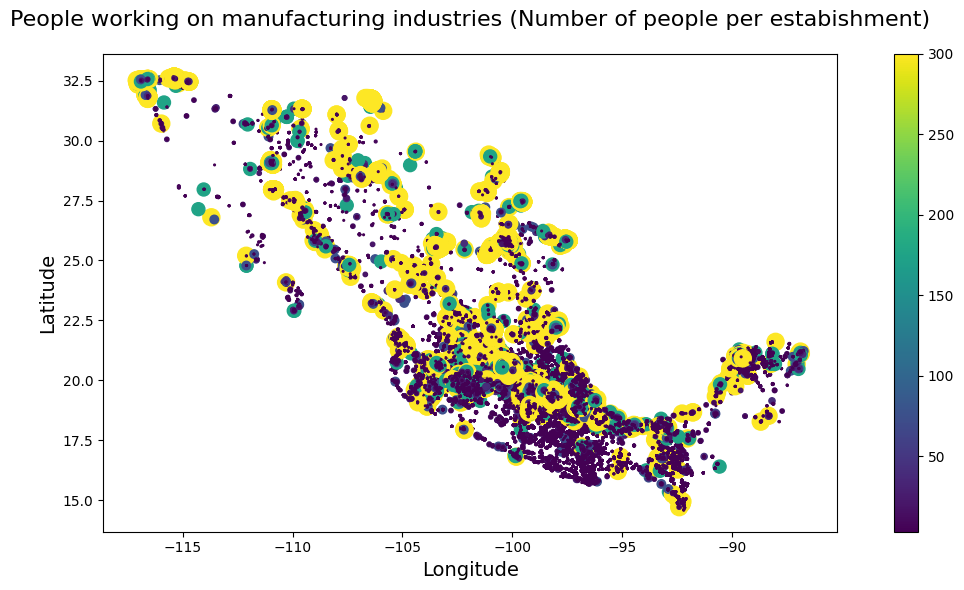

In [121]:
mapper = {'0 a 5 personas': 3, '6 a 10 personas': 8, '51 a 100 personas': 75,
       '31 a 50 personas': 40, '11 a 30 personas': 20, '101 a 250 personas': 175,
       '251 y más personas':300}
industrias['personas'] = industrias['per_ocu'].replace(mapper)
plot_map(industrias, "People working on manufacturing industries (Number of people per estabishment)",column = 'personas',markersize = industrias['personas']/2)

In [76]:
constru_path = '/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/denue_00_23_shp/conjunto_de_datos/denue_inegi_23_.shp'
constru= gpd.read_file(constru_path)
constru.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,7625351,14120238210000801000000000U0,FLASHCOM TECHNOLOGY,None,238210,Instalaciones eléctricas en construcciones,0 a 5 personas,CALLE,PERIFERICO NORTE MANUEL GOMEZ MORIN,CALLE,...,0231,027,None,VENTAS@FLASHCOM.COM.MX,FLAHCOM.COM.MX,Fijo,20.730183,-103.412502,2019-11,POINT (-103.4125 20.73018)
1,11698432,14053238210000071000000000U3,FISAI,None,238210,Instalaciones eléctricas en construcciones,0 a 5 personas,CALLE,JOSE VILLALOBOS ORTIZ,PRIVADA,...,1095,022,None,None,None,Fijo,21.367058,-101.919125,2024-11,POINT (-101.91912 21.36706)
2,6146392,14039236211000274010000000U2,FLOTA CONSTRUCTORA,FLOTA CONSTRUCTORA SA DE CV,237312,"Construcción de carreteras, puentes y similares",11 a 30 personas,AVENIDA,LOPEZ DE LEGAZPI,CALLE,...,2696,040,3311105143,FLOTA22@YAHOO.COM.MX,None,Fijo,20.640856,-103.388314,2010-07,POINT (-103.38831 20.64086)
3,9344522,14039236111003742000000000U7,FLORESTA SANTA ANITA,FLORESTA SANTA ANITA SA DE CV,236221,Edificación de inmuebles comerciales y de serv...,11 a 30 personas,CALLE,BUENOS AIRES,CALLE,...,0577,003,None,ADMINISTRACION@VIVEENTI.COM,None,Fijo,20.697068,-103.384077,2021-05,POINT (-103.38408 20.69707)
4,6713171,14039236111002091000000000U0,FIMAJI DESARROLLOS,FIMAJI DESARROLLOS SA DE CV,236111,Edificación de vivienda unifamiliar,0 a 5 personas,CALLE,FRAY FRANCISCO FREJES,CALLE,...,0948,017,None,GRUPO-CONSTRUCTOR1@HOTMAIL.COM,None,Fijo,20.686255,-103.376666,2016-01,POINT (-103.37667 20.68625)


In [77]:
mapper = {'0 a 5 personas': 3, '6 a 10 personas': 8, '51 a 100 personas': 75,
       '31 a 50 personas': 40, '11 a 30 personas': 20, '101 a 250 personas': 175,
       '251 y más personas':300}
constru['personas'] = constru['per_ocu'].replace(mapper)


/tmp/ipykernel_211157/1641548141.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  constru['personas'] = constru['per_ocu'].replace(mapper)


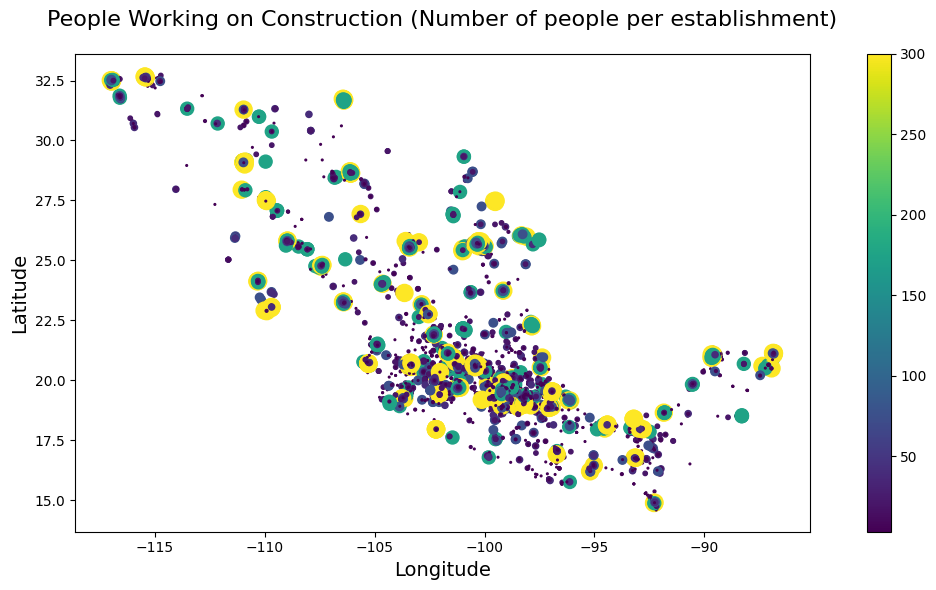

In [122]:
plot_map(constru, 'People Working on Construction (Number of people per establishment)',column = 'personas', markersize= constru['personas']/2) 

In [2]:
agricultura_path = 
'/home/raqcoss/Shared/Notebook/Machine Learning/WATER/datasets/denue_00_11_shp/conjunto_de_datos/denue_inegi_11_.shp'
agricultura= gpd.read_file(agricultura_path)
agricultura.head()

,id,clee,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipo_vial,nom_vial,tipo_v_e_1,...,ageb,manzana,telefono,correoelec,www,tipoUniEco,latitud,longitud,fecha_alta,geometry
0,8274421,13059112512000021000000000O6,PESQUERA LA CORALILLA,PESQUERA LA CORALILLA SC DE RL DE CV,112515,Piscicultura en agua dulce,0 a 5 personas,PRIVADA,Primera de General Francisco Villa,CALLE,...,005A,014,7721147984,None,None,Fijo,20.428226,-99.093489,2019-11,POINT (-99.09349 20.42823)
1,11844970,13038112515000011000000000O4,PISCICOLA RANCHO BUENAVISTA,None,112515,Piscicultura en agua dulce,6 a 10 personas,CALLE,Ninguno,CALLE,...,0024,800,None,None,None,Fijo,20.202561,-98.681731,2025-05,POINT (-98.68173 20.20256)
2,6170525,13063112512000014000000000U0,PESCADORES UNIDOS DE LA PRESA REQUENA VEINTE A...,PESCADORES UNIDOS DE LA PRESA REQUENA VEINTE A...,114119,"Pesca y captura de peces, crustáceos, moluscos...",51 a 100 personas,OTRO(ESPECIFIQUE),NINGUNO,OTRO(ESPECIFIQUE),...,0328,032,None,None,None,Fijo,19.922303,-99.339189,2010-07,POINT (-99.33919 19.9223)
3,6170516,13035112512000033011000000O1,PESCADORES UNIDOS DE METEPEC,PESCADORES UNIDOS DE METEPEC S DE SS,114119,"Pesca y captura de peces, crustáceos, moluscos...",0 a 5 personas,CARRETERA,ENTRADA A LA PRESA,CARRETERA,...,0022,800,7717203565,None,None,Fijo,20.226880,-98.321080,2010-07,POINT (-98.32108 20.22688)
4,6170515,13037112512000012001000000U1,PISCICULTURA EN AGUA DULCE SIN NOMBRE,None,112515,Piscicultura en agua dulce,31 a 50 personas,CALLE,NINGUNO,OTRO(ESPECIFIQUE),...,0012,029,7751049585,None,None,Fijo,20.639066,-98.829030,2010-07,POINT (-98.82903 20.63907)


In [8]:
mapper = {'0 a 5 personas': 3, '6 a 10 personas': 8, '51 a 100 personas': 75,
       '31 a 50 personas': 40, '11 a 30 personas': 20, '101 a 250 personas': 175,
       '251 y más personas':300}
agricultura['personas'] = agricultura['per_ocu'].replace(mapper)

/tmp/ipykernel_211157/2240170560.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  agricultura['personas'] = agricultura['per_ocu'].replace(mapper)


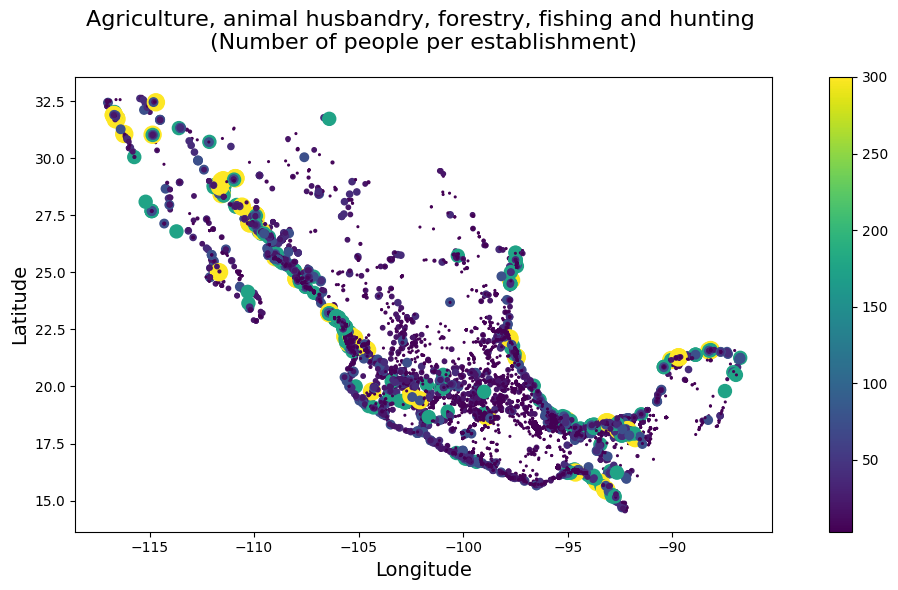

In [125]:

plot_map(agricultura, 'Agriculture, animal husbandry, forestry, fishing and hunting \n(Number of people per establishment)',
         column = 'personas', markersize= agricultura['personas']/2) 

# Merge DataFrames 

In [76]:
avg_altitude_by_municipality.reset_index(inplace=True)
all_data = poblacion[['CVEGEO','NOM_ENT','NOM_MUN', 'POB_TOTAL']].merge(avg_altitude_by_municipality[['CVEGEO','ALTITUD']], on = 'CVEGEO',how='outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196
1,01002,Aguascalientes,Asientos,51536,2030.520325
2,01003,Aguascalientes,Calvillo,58250,1827.143813
3,01004,Aguascalientes,Cosío,17000,1967.656566
4,01005,Aguascalientes,Jesús María,129929,1936.513072
...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226
2474,32055,Zacatecas,Villanueva,31558,1962.535211
2475,32056,Zacatecas,Zacatecas,149607,2263.314961
2476,32057,Zacatecas,Trancoso,20455,2136.738095


In [77]:
all_data = all_data.merge(municipios[['CVEGEO','AREA']], on = 'CVEGEO', how='outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156
...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672


In [78]:
all_data = all_data.merge(inundabilidad[['CVEGEO','UMBRAL12H','PORCENTA_1']], on = 'CVEGEO',how='outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602
...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207


In [79]:
all_data = all_data.merge(metropolis[['CVEGEO','urban']], on = 'CVEGEO',how='outer')
all_data['urban'].fillna(0, inplace=True) #In this case, NaN are rural areas that anre not included in metropolis df, so urbanization level is 0.
all_data


/tmp/ipykernel_15286/1113561373.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_data['urban'].fillna(0, inplace=True) #In this case, NaN are rural areas that anre not included in metropolis df, so urbanization level is 0.


,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056,3.0
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541,0.0
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972,0.0
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082,0.0
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602,3.0
...,...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430,0.0
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213,0.0
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201,3.0
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207,3.0


In [80]:
all_data = all_data.merge(servicios_agua_mun[['CVEGEO','agua_AR', 'agua_FC', 'agua_PA', 'agua_PT', 'agua_PP']],on='CVEGEO', how = 'outer')
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056,3.0,91.0,226.0,2.0,24.0,0.0
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541,0.0,0.0,54.0,1.0,9.0,0.0
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972,0.0,7.0,43.0,1.0,4.0,0.0
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082,0.0,10.0,13.0,1.0,3.0,0.0
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602,3.0,34.0,42.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430,0.0,11.0,31.0,1.0,3.0,0.0
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213,0.0,4.0,10.0,1.0,2.0,0.0
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201,3.0,5.0,22.0,1.0,2.0,0.0
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207,3.0,8.0,9.0,1.0,2.0,0.0


In [81]:
all_data

,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP
0,01001,Aguascalientes,Aguascalientes,948990,1918.046196,116635.924756,57.80700,4.829056,3.0,91.0,226.0,2.0,24.0,0.0
1,01002,Aguascalientes,Asientos,51536,2030.520325,54337.426602,60.05970,4.274541,0.0,0.0,54.0,1.0,9.0,0.0
2,01003,Aguascalientes,Calvillo,58250,1827.143813,92335.783227,60.71769,1.158972,0.0,7.0,43.0,1.0,4.0,0.0
3,01004,Aguascalientes,Cosío,17000,1967.656566,12838.354453,52.22142,3.153082,0.0,10.0,13.0,1.0,3.0,0.0
4,01005,Aguascalientes,Jesús María,129929,1936.513072,49989.509156,58.46688,3.357602,3.0,34.0,42.0,1.0,16.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,32054,Zacatecas,Villa Hidalgo,19446,2167.903226,37142.598661,58.41954,5.038430,0.0,11.0,31.0,1.0,3.0,0.0
2474,32055,Zacatecas,Villanueva,31558,1962.535211,215650.560215,61.17057,3.174213,0.0,4.0,10.0,1.0,2.0,0.0
2475,32056,Zacatecas,Zacatecas,149607,2263.314961,43682.101048,60.79104,3.129201,3.0,5.0,22.0,1.0,2.0,0.0
2476,32057,Zacatecas,Trancoso,20455,2136.738095,21844.700672,55.98486,3.752207,3.0,8.0,9.0,1.0,2.0,0.0


In [82]:
# Adding human impact
all_data = all_data.merge(municipios_with_impact[['CVEGEO','avg_impact', 'std_impact']],on ='CVEGEO', how= 'outer')

In [141]:
all_data[['CVEGEO','UMBRAL12H']][all_data['UMBRAL12H'].isna()]


,CVEGEO,UMBRAL12H
16,02006,NaN
17,02007,NaN
34,04012,NaN
35,04013,NaN
202,07120,NaN
203,07121,NaN
204,07122,NaN
205,07123,NaN
206,07124,NaN
207,07125,NaN


In [133]:
municipios_sin_datos = all_data[all_data['AREA'].isna()].index

In [134]:
all_data = all_data.drop(index=municipios_sin_datos).reset_index()

In [143]:
all_data[all_data['POB_TOTAL'].isna()]

,index,CVEGEO,NOM_ENT,NOM_MUN,POB_TOTAL,ALTITUD,AREA,UMBRAL12H,PORCENTA_1,urban,agua_AR,agua_FC,agua_PA,agua_PT,agua_PP,avg_impact,std_impact
17,17,02007,Baja California,San Felipe,None,80.431227,1.106926e+06,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.312796,0.182419
35,35,04013,Campeche,Dzitbalché,None,15.910714,3.633952e+04,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.797697,0.097054
457,457,12082,Guerrero,Las Vigas,None,31.722222,1.481188e+04,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.846292,0.124765
458,458,12083,Guerrero,Ñuu Savi,None,901.977273,3.630472e+04,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.679768,0.186810
459,459,12084,Guerrero,Santa Cruz del Rincón,None,939.571429,8.897286e+03,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.723000,0.148144
460,460,12085,Guerrero,San Nicolás,None,39.206897,1.681358e+04,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.902633,0.068735


<Axes: >

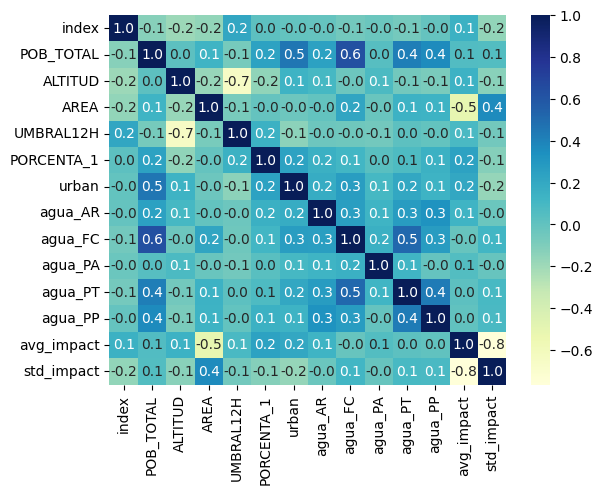

In [135]:
import seaborn as sns

# Vizualize correlation between features. Any highly correlated variable must be excluded from the analysis.
parcial_correlation_matrix = all_data.drop(['CVEGEO', 'NOM_ENT', 'NOM_MUN'], axis=1).corr()
sns.heatmap(parcial_correlation_matrix, cmap="YlGnBu", annot=True, fmt=".1f")


In [ ]:
# Save results to csv
all_data_path = 'all_data_raquel.csv'
all_data.to_csv(all_data_path)